# Machine Learning project

Data Used - US College Data.csv

Efforts by - Anchal Mishra
roll no. - 18csu019


Contents
1) Data Preprocessing 

2) Data Visualisation 

3) Regression Analysis (5 types)

4) Feature Selection using chi2

5) Classification (5 types) (hypertuning parameters and performance measures also used)

# US_COLLEGE_DATASET: 

# Introduction to the dataset:- A complete csv file with columns like private , graduation rates , Student Faculty ratio,etc of more than 500 colleges/universities.

# Attribute Information

1. Private A factor with levels No and Yes indicating private or public university

2. Apps Number of applications received

3. Accept Number of applications accepted

4. Enroll Number of new students enrolled

5. Top10perc Pct. new students from top 10% of H.S. class

6. Top25perc Pct. new students from top 25% of H.S. class

7. F. Undergrad Number of fulltime undergraduates

8. P. Undergrad Number of part time undergraduates

9. Outstate Out-of-state tuition

10. Room. Board Room and board costs

11. Books Estimated book costs

12. Personal Estimated personal spending

13. PhD Pct. of faculty with Ph.D.’s

14. Terminal Pct. of faculty with terminal degree

15. S.F. Ratio Student/faculty ratio

16. perc. alumni Pct. alumni who donate

17. Expend Instructional expenditure per student

18. Grad. Rate Graduation rate




# STEP 0:- IMPORT LIBRARIES:

In [126]:
# Import the Libraries

# used for handling numbers
import numpy as np 

import pandas as pd   # used for handling the dataset

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

# STEP 1:- IMPORT DATASET

In [127]:
#Read the Dataset

In [128]:
dataset=pd.read_csv('College_Data.csv')

In [129]:
#show first 10 rows

dataset.head(10)

,US_College_Data,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Yes
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Yes
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Yes
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Yes
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,Yes
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,Yes
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,Yes
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,Yes
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,Yes


In [130]:
# Show how many row and columns present
dataset.shape

(777, 19)

In [131]:
dataset.index

RangeIndex(start=0, stop=777, step=1)

In [132]:
# Show columns present in dataset
dataset.columns

Index(['US_College_Data', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Private'],
      dtype='object')

In [133]:
# Show stats way in dataset min,max,count,percentile
dataset.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# STEP 3:-DATA PREPROCESSING- 

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.

In [134]:
# Check out the missing values
#The concept of missing values is important to understand in order to successfully manage data. There is no missing or Nan values present in our dataset.

In [135]:
dataset.isnull().sum()

US_College_Data    0
Apps               0
Accept             0
Enroll             0
Top10perc          0
Top25perc          0
F.Undergrad        0
P.Undergrad        0
Outstate           0
Room.Board         0
Books              0
Personal           0
PhD                0
Terminal           0
S.F.Ratio          0
perc.alumni        0
Expend             0
Grad.Rate          0
Private            0
dtype: int64

In [136]:
dataset

,US_College_Data,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Yes
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Yes
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Yes
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Yes
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,Yes
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,Yes
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,Yes
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,Yes
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,Yes


# Data Cleaning

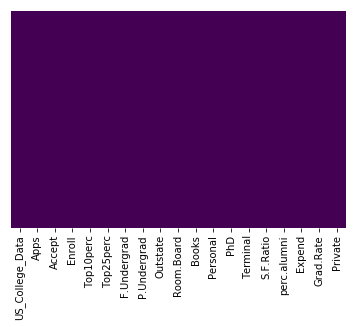

In [137]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handling Text and categorical values:

It covert the categorical data  to numeric data .In US College dataset present two columns of categorical data one is College name ad another is College private or not. We apply Label Encoder on Private which is present in [0] index position it convert in to numerical form.

In [138]:
from sklearn.preprocessing import LabelEncoder # used for encoding categorical data
labelencoder=LabelEncoder()



dataset['Private'] = labelencoder.fit_transform(dataset['Private'])
dataset

,US_College_Data,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,1
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,1
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,1
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,1
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,1


# DATA VISUALIZATION:-

In [139]:
Private = dataset[dataset['Private']==1]
did_not_Private = dataset[dataset['Private']==0]

In [140]:
# Counting some values
print('Total = ',len(dataset))
print('Number of Private College = ',len(Private ))
print('Percentage Private = ', 1.* len(Private)/len(dataset) * 100, "%")
print('Did not Private =', len(did_not_Private))
print('Percentage did not Private= ', 1.* len(did_not_Private)/len(dataset) * 100, "%")

Total =  777
Number of Private College =  565
Percentage Private =  72.71557271557272 %
Did not Private = 212
Percentage did not Private=  27.28442728442728 %


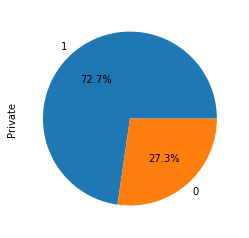

In [141]:

dataset['Private'].value_counts().plot.pie(autopct='%1.1f%%' )

Text(0.5, 1.0, 'Class Distributions \n (0: No Private College || 1: Private College)')

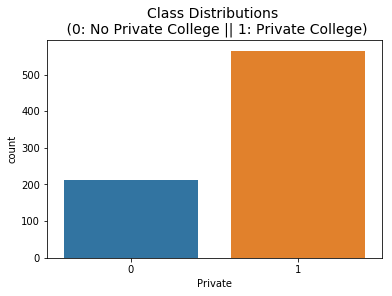

In [142]:
sns.countplot('Private', data=dataset)

plt.title('Class Distributions \n (0: No Private College || 1: Private College)', fontsize=14)

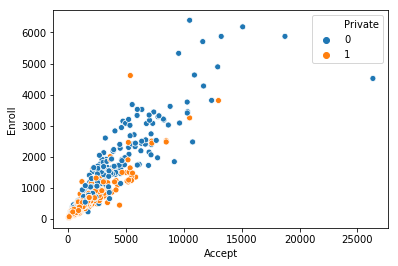

In [143]:
#Scatter plot between Accept and Enrollit shows the relationship between Accept and Enroll. 
#On the basis of it show how many college are private or not.

sns.scatterplot('Accept', 'Enroll', data=dataset, hue='Private')

# Looking for Correlations

Correlation coeff ranges from -1 to 1. When it is close to 1, it means there is strong positive correlation, -1 is strong negative correlation 0 indicates no correlation.

In [144]:
corr_matrix = dataset.corr()

In [145]:
corr_matrix["Accept"].sort_values(ascending=False)

Accept         1.000000
Apps           0.943451
Enroll         0.911637
F.Undergrad    0.874223
P.Undergrad    0.441271
PhD            0.355758
Terminal       0.337583
Top25perc      0.247476
Personal       0.200989
Top10perc      0.192447
S.F.Ratio      0.176229
Expend         0.124717
Books          0.113525
Room.Board     0.090899
Grad.Rate      0.067313
Outstate      -0.025755
perc.alumni   -0.159990
Private       -0.475252
Name: Accept, dtype: float64

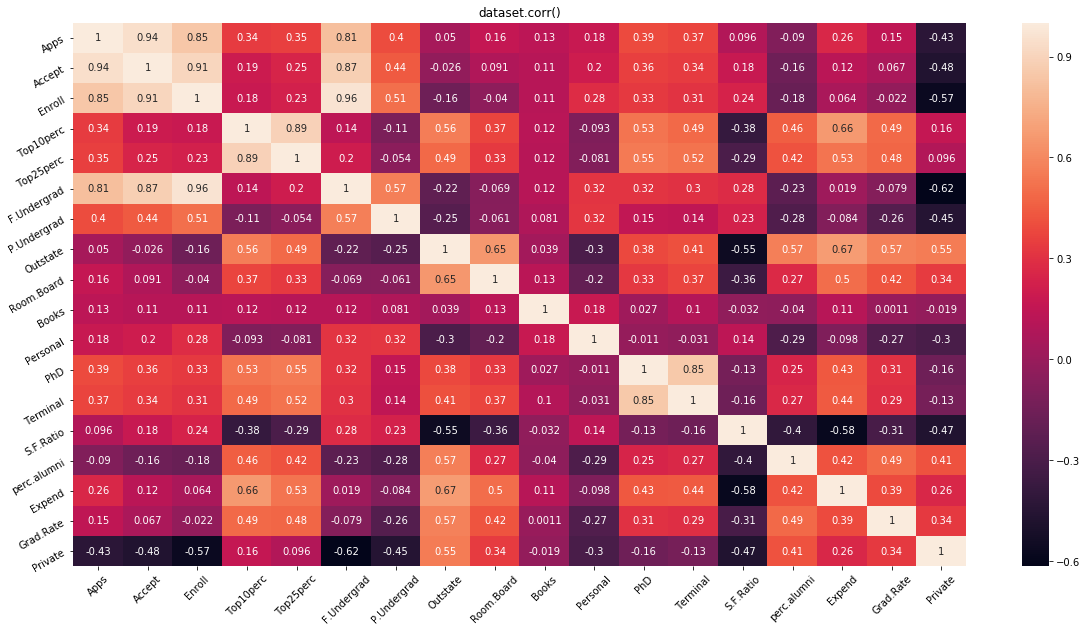

In [146]:

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)
plt.title('dataset.corr()')
plt.xticks(rotation=45)
plt.yticks(rotation=30)
plt.show()

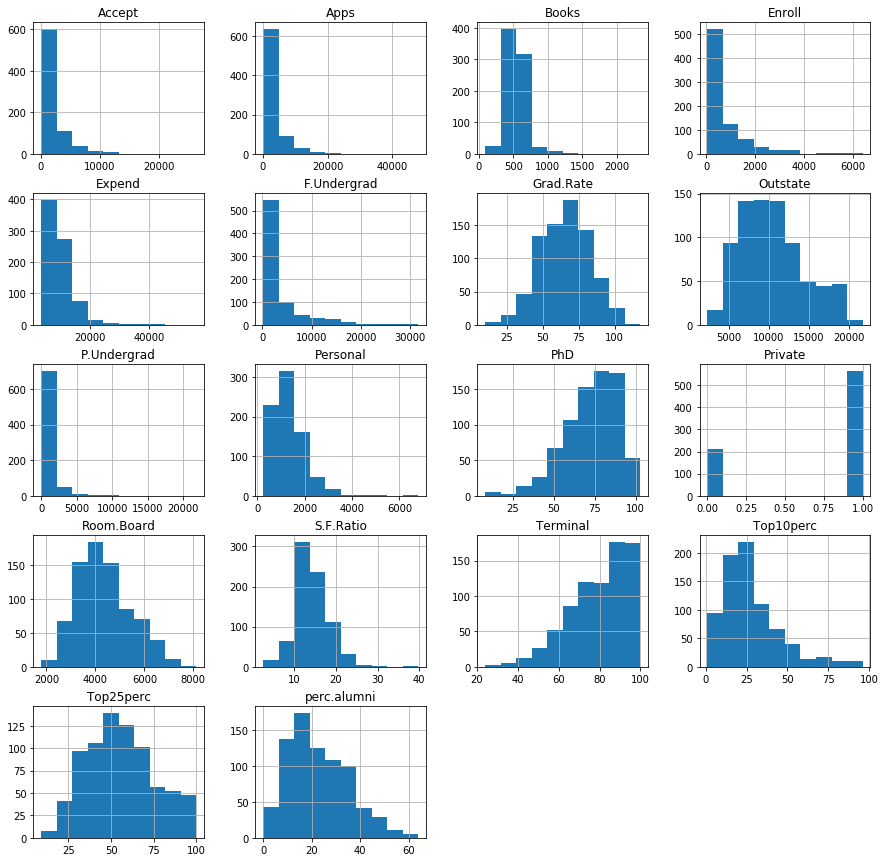

In [147]:
dataset.hist(figsize=(15,15));

Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
Private            0.727156
dtype: float64


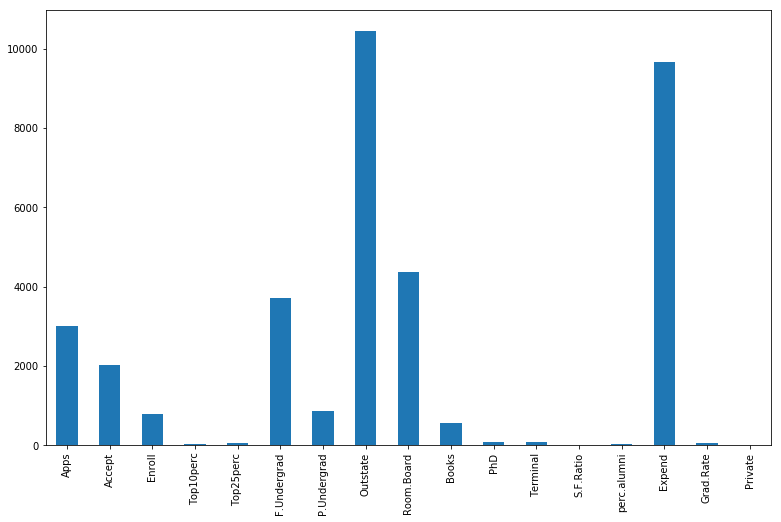

In [148]:
dataset[['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate','Private']].mean().plot('bar',figsize=(13,8))

print(dataset[['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate','Private']].mean())

In [149]:
dataset[dataset['Grad.Rate']>100]

,US_College_Data,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
95,Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,1


# Machine Learning Algorithms:-

# 1.Simple linear Regression:-

Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables.

In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.

In [150]:

X = pd.DataFrame(dataset.iloc[:,2])
y = pd.DataFrame(dataset.iloc[:,3])

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [151]:


#Fitting Simple linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
print('Coefficients\n',regressor.coef_)

print('Intercept\n',regressor.intercept_)

#Predicting the Test set results
y_pred=regressor.predict(X_test)

#The Mean Squared error
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
#Best possible score is 1.0 and it can be negative

print("R2 score: {}".format(r2_score(y_test,y_pred)))

a=" {}".format(r2_score(y_test,y_pred))

p= " {}".format(mean_squared_error(y_test,y_pred))

Coefficients
 [[0.35389996]]
Intercept
 [76.67272643]
Mean squared error: 140856.74820005632
R2 score: 0.8006513814278996


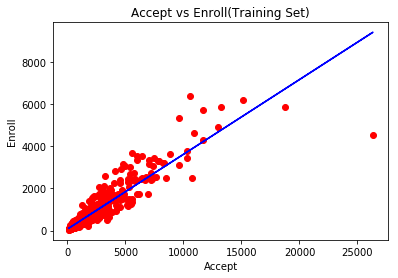

In [153]:
#Visualizing a train set result:-
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')

plt.title('Accept vs Enroll(Training Set)')
plt.xlabel('Accept')
plt.ylabel('Enroll')
plt.show()


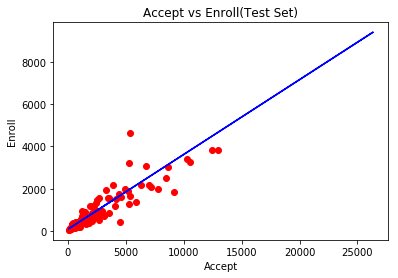

In [154]:
#Visualizing a test set:-

plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')

plt.title('Accept vs Enroll(Test Set)')
plt.xlabel('Accept')
plt.ylabel('Enroll')
plt.show()

# 2. Multiple Linear Regression:

In [155]:
X = pd.DataFrame(dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,16]])

y = pd.DataFrame(dataset.iloc[:,17])


In [156]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [157]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

b=" {}".format(r2_score(y_test,y_pred))
q= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.8006513814278996
Mean squared error:140856.74820005632
absolute error 208.9745455605876
mean absolute error 375.308870398844


# Decision Tree Regression:-
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

In [158]:
X = pd.DataFrame(dataset.iloc[:,2])
y = pd.DataFrame(dataset.iloc[:,3])

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [160]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [161]:
y_pred=tree_reg.predict(X_test)

In [162]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

c=" {}".format(r2_score(y_test,y_pred))
r= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.784095715827776
Mean squared error:245990.7629985755
absolute error 267.39636752136755
mean absolute error 495.9745588218971


# Polynomial Regression:-

1.Polynomial provides the best approximation of the relationship between the dependent and independent variable.
2.A Broad range of function can be fit under it.
3.Polynomial basically fits a wide range of curvature.

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [164]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [165]:
y_pred=tree_reg.predict(X_test)

In [166]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

d=" {}".format(r2_score(y_test,y_pred))
s= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.9557573408784131
Mean squared error:29628.57745726496
absolute error 67.20192307692308
mean absolute error 172.12953685310654


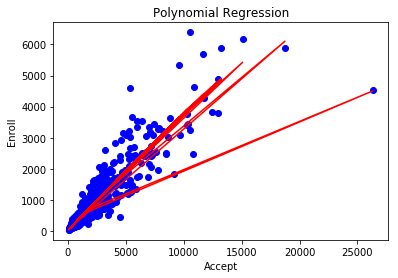

In [167]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Accept') 
plt.ylabel('Enroll') 
  
plt.show()

# Random Forest Regression:-

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [169]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [170]:
y_pred=forest_reg.predict(X_test)

In [171]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

e=" {}".format(r2_score(y_test,y_pred))
t= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.7944864364302403
Mean squared error:203389.95286846507
absolute error 243.07097222222214
mean absolute error 450.98775245949315


# SVM (Support Vector Machine)

In [172]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


399.9208275395184

In [173]:
y_pred=svm_reg.predict(X_test)

In [174]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))

print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

f=" {}".format(r2_score(y_test,y_pred))
u= " {}".format(mean_squared_error(y_test,y_pred))

R squared value:0.8383934202047699
Mean squared error:159936.66829989324
absolute error 209.55327150152058
mean absolute error 399.9208275395184


# Resulatant table for r2 score:-

In [175]:
print("R2 score for the following regressions are")
print("simple linear regression:",a)
print("multiple linear regression:",b)
print("decision tree regression:",c)
print("polynomial regression:",d)
print("random forest regressor:",e)
print("support vector regression:",f)



R2 score for the following regressions are
simple linear regression:  0.8006513814278996
multiple linear regression:  0.8006513814278996
decision tree regression:  0.784095715827776
polynomial regression:  0.9557573408784131
random forest regressor:  0.7944864364302403
support vector regression:  0.8383934202047699


# Resulatant table for Mean squared error:-

In [176]:
print("R2 score for the following regressions are")
print("simple linear regression:",p)
print("multiple linear regression:",q)
print("decision tree regression:",r)
print("polynomial regression:",s)
print("random forest regressor:",t)
print("support vector regression:",u)



R2 score for the following regressions are
simple linear regression:  140856.74820005632
multiple linear regression:  140856.74820005632
decision tree regression:  245990.7629985755
polynomial regression:  29628.57745726496
random forest regressor:  203389.95286846507
support vector regression:  159936.66829989324


# Feature Selection:- 
Top reasons to use feature selection are:

It enables the machine learning algorithm to train faster.
It reduces the complexity of a model and makes it easier to interpret.
It improves the accuracy of a model if the right subset is chosen.
It reduces overfitting.

Univariate Selection
We are using chi-squared (chi²) statistical test to select 5 of the best features from the Dataset.

In [177]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = dataset.iloc[:,[2,3,4,5,6,7,8,9,10,11]]  # Independent variables
y = dataset.iloc[:,12]    # Dependent variable 

# Applying SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func = chi2, k=5)
fit = bestfeatures.fit(X,y)

# Finding the score of the given independent variables.
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns

# Printing scores of various attributes
print(featureScores)

    Attributes          Score
0       Accept  508863.397475
1       Enroll  163689.130515
2    Top10perc    3694.528633
3    Top25perc    2144.416436
4  F.Undergrad  924060.018116
5  P.Undergrad  232963.445104
6     Outstate  350238.636731
7   Room.Board   52743.343786
8        Books   10914.470004
9     Personal   30507.256188


In [178]:
# Print top 5 best features
print(featureScores.nlargest(5,'Score')) 

    Attributes          Score
4  F.Undergrad  924060.018116
0       Accept  508863.397475
6     Outstate  350238.636731
5  P.Undergrad  232963.445104
1       Enroll  163689.130515


Various performance measures for classification


In [179]:
def accuracy(cm):
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
def error_rate(cm):
    return (cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
def sensitivity(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])
def specificity(cm):
    return cm[1][1]/(cm[1][0]+cm[1][1])
def precision(cm):
    return cm[0][0]/(cm[0][0]+cm[1][0])
def recall(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])
def f1(cm):
    return (2*precision(cm)*recall(cm))/(precision(cm)+recall(cm))

In [180]:
X = dataset['Accept'].values.reshape(-1,1)
y = dataset['Enroll'].values

In [181]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [182]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Our independent variables/Matrices of features(X) are Accept, and dependent variable(y) is Enroll.

# Classification:-
Classification is a data mining function that assigns items in a collection to target categories or classes. The goal of classification is to accurately predict the target class for each case in the data. For example, a classification model could be used to identify loan applicants as low, medium, or high credit risks.

# LOGISTIC REGREESION:-
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [183]:
dataset.drop(['US_College_Data','Apps','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD',
              'Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate'],axis = 1 , inplace = True)

In [184]:
y = dataset['Private'].values
X = dataset.drop('Private', axis = 1).values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:, 0] = labelEncoder_X.fit_transform(X[:, 0])
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22 )

In [185]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [186]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22 )

In [187]:
X_train 

array([[ 0.04626404, -0.18196959],
       [ 1.25903594,  0.79910031],
       [ 0.79798216, -0.13996989],
       ...,
       [-1.44714928, -0.73981175],
       [-0.98108405, -0.71181196],
       [-1.33188584, -0.70858121]])

In [188]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [189]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [190]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [191]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

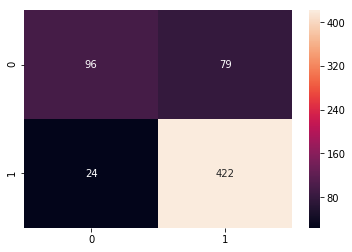

In [192]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm , annot = True, fmt = "d")

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.80      0.55      0.65       175
           1       0.84      0.95      0.89       446

   micro avg       0.83      0.83      0.83       621
   macro avg       0.82      0.75      0.77       621
weighted avg       0.83      0.83      0.82       621



In [194]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

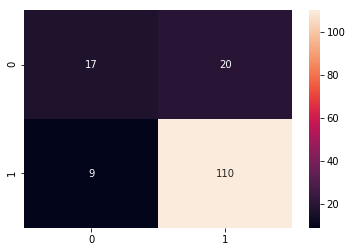

In [195]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm , annot = True ,fmt = "d")

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54        37
           1       0.85      0.92      0.88       119

   micro avg       0.81      0.81      0.81       156
   macro avg       0.75      0.69      0.71       156
weighted avg       0.80      0.81      0.80       156



# Perofrmance measuring:

In [197]:
# Performance Measures for classification
print('Accuracy    :',accuracy(cm))
print('Sensitivity :',sensitivity(cm))
print('Specificity :',specificity(cm))
print('Precision   :',precision(cm))
print('Recall      :',recall(cm))
print('F-1 Score   :',f1(cm))
LR_Acc = accuracy(cm)
LR_Prec = precision(cm)
LR_F1 = f1(cm)

Accuracy    : 0.8141025641025641
Sensitivity : 0.4594594594594595
Specificity : 0.9243697478991597
Precision   : 0.6538461538461539
Recall      : 0.4594594594594595
F-1 Score   : 0.5396825396825398


# Using KNN Classification:-

KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
knn = KNeighborsClassifier(n_neighbors=1)

In [201]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [202]:
pred = knn.predict(X_test)

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [203]:
error_rate = []

# Will take some time
for i in range(1,23):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

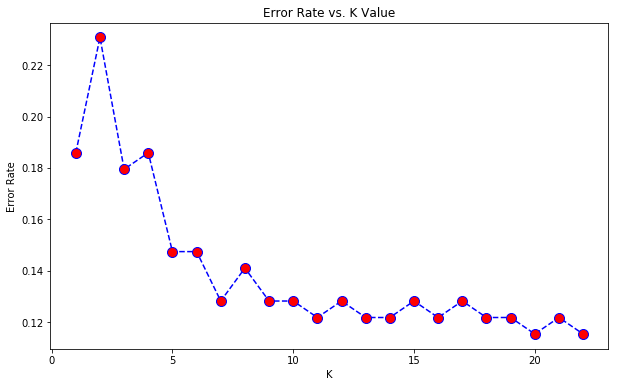

In [204]:
plt.figure(figsize=(10,6))
plt.plot(range(1,23),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [205]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 27  14]
 [ 15 100]]


              precision    recall  f1-score   support

           0       0.64      0.66      0.65        41
           1       0.88      0.87      0.87       115

   micro avg       0.81      0.81      0.81       156
   macro avg       0.76      0.76      0.76       156
weighted avg       0.82      0.81      0.81       156



In [206]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[ 24  17]
 [  3 112]]


              precision    recall  f1-score   support

           0       0.89      0.59      0.71        41
           1       0.87      0.97      0.92       115

   micro avg       0.87      0.87      0.87       156
   macro avg       0.88      0.78      0.81       156
weighted avg       0.87      0.87      0.86       156



# Perofrmance measuring:

In [207]:
print(accuracy(cm))

print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f1(cm))
KNN_Acc = accuracy(cm)
KNN_Prec = precision(cm)
KNN_F1 = f1(cm)

0.8141025641025641
0.4594594594594595
0.9243697478991597
0.6538461538461539
0.4594594594594595
0.5396825396825398


# USING NAIVE BAYES Classification:-
Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification. Naïve Bayes performs well in cases of categorical input variables compared to numerical variables.

In [247]:
# Divide the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING THE MODEL

In [248]:
X_train.shape

(400, 2)

In [249]:
y_train.shape

(400,)

In [250]:
X_test.shape

(100, 2)

In [251]:
y_test.shape

(100,)

In [252]:
# Train a classifier

from sklearn.naive_bayes import GaussianNB 
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [253]:
# Predict the training set results

from sklearn.metrics import classification_report, confusion_matrix

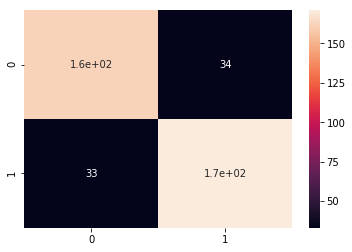

In [254]:
# Predicting the Train set results
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

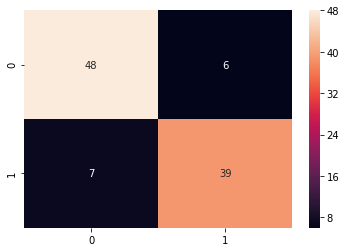

In [255]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [256]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.87      0.85      0.86        46

   micro avg       0.87      0.87      0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



# IMPROVING THE MODEL

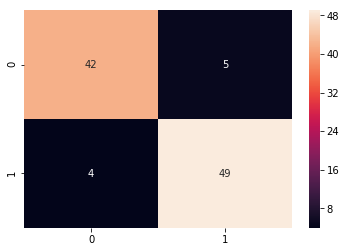

In [257]:
# Train the classifier again!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [258]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.91      0.92      0.92        53

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



# Perofrmance measuring -->

In [259]:
print(accuracy(cm))

print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f1(cm))

NB_Acc = accuracy(cm)
NB_Prec = precision(cm)
NB_F1 = f1(cm)

0.91
0.8936170212765957
0.9245283018867925
0.9130434782608695
0.8936170212765957
0.9032258064516129


# SVM Classification:-

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

# Support Vector Machine (Linear kernel)

Using Random Search for hypertuning the parameters of Support Vector Classifier with kernel 'linear'.

In [260]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Using Random Search technique for findong the right set of hyperparameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
rnd = RandomizedSearchCV(SVC(kernel='linear'),param_grid,refit=True,verbose=2)

# Fitting the Kernel SVM to the Training set
rnd.fit(X_train,y_train)

# Predicting the Test set results
rnd_predictions = rnd.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test,rnd_predictions)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=1, C=100 ..................................................
[CV] ................................... gamma=1, C=100, total=   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ................................... gamma=1, C=100, total=   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ................................... gamma=1, C=100, total=   0.0s
[CV] gamma=0.01, C=1 .................................................
[CV] .................................. gamma=0.01, C=1, total=   0.0s
[CV] gamma=0.01, C=1 .................................................
[CV] .................................. gamma=0.01, C=1, total=   0.0s
[CV] gamma=0.01, C=1 .................................................
[CV] .................................. gamma=0.01, C=1, total=   0.0s
[CV] gamma=0.001, C=10 ...............................................
[CV] ...........

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [261]:
print(cm)

[[42  5]
 [ 4 49]]


In [262]:
print("Classification report for SVM - linear Classification\n")
print(classification_report(y_test, rnd_predictions))

Classification report for SVM - linear Classification

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.91      0.92      0.92        53

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



# Perofrmance measuring

In [263]:
print(accuracy(cm))

print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f1(cm))

SVC_K_Acc = accuracy(cm)
SVC_K_Prec = precision(cm)
SVC_K_F1 = f1(cm)

0.91
0.8936170212765957
0.9245283018867925
0.9130434782608695
0.8936170212765957
0.9032258064516129


# Kernel SVM - Polynominal

Using Grid Search for hypertuning the parameters of Support Vector Classifier with kernel 'poly'.

In [264]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Using Grid search technique for findong the right set of hyperparameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(kernel='poly'),param_grid,refit=True,verbose=2)

# Fitting the Kernel SVM to the Training set
grid.fit(X_train,y_train)

# Predicting the Test set results
grid_predictions = grid.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test,grid_predictions)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


In [265]:
print(cm)

[[42  5]
 [ 7 46]]


In [266]:
print("Classification report for SVM - Poly Classification\n")
print(classification_report(y_test, grid_predictions))

Classification report for SVM - Poly Classification

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.90      0.87      0.88        53

   micro avg       0.88      0.88      0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [267]:
# Performance Measures for classification
print('Accuracy    :',accuracy(cm))
print('Sensitivity :',sensitivity(cm))
print('Specificity :',specificity(cm))
print('Precision   :',precision(cm))
print('Recall      :',recall(cm))
print('F-1 Score   :',f1(cm))
SVC_P_Acc = accuracy(cm)
SVC_P_Prec = precision(cm)
SVC_P_F1 = f1(cm)

Accuracy    : 0.88
Sensitivity : 0.8936170212765957
Specificity : 0.8679245283018868
Precision   : 0.8571428571428571
Recall      : 0.8936170212765957
F-1 Score   : 0.875


# Decision Tree Classification:-

Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage.


In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [269]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Perofrmance measuring 

In [270]:
print(accuracy(cm))

print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f1(cm))

DCT_Acc = accuracy(cm)
DCT_Prec = precision(cm)
DCT_F1 = f1(cm)

0.88
0.8936170212765957
0.8679245283018868
0.8571428571428571
0.8936170212765957
0.875


# Random Forest Classification:-
Random forest algorithm can be used for both classifications and regression task. ... Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won't allow overfitting trees in the model.

In [271]:
# Fitting the Random Forest Classification to the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  5]
 [ 9 41]]


In [272]:
print("Classification report for Random Forest Classification\n")
print(classification_report(y_test, y_pred))

Classification report for Random Forest Classification

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.89      0.82      0.85        50

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# Perofrmance measuring 

In [273]:
print(accuracy(cm))
print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f1(cm))

RF_Acc = accuracy(cm)
RF_Prec = precision(cm)
RF_F1 = f1(cm)

0.86
0.9
0.82
0.8333333333333334
0.9
0.8653846153846153


# Hypertuning the parameters using Grid Search:-

Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [276]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [277]:
knn_gscv.best_score_

0.924

# Voting classifiers:-
Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

Hard voting is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy. 
Soft Voting can only be done when all your classifiers can calculate probabilities for the outcomes.

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [280]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [281]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [282]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [283]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


# Comparison of given Classifiers:-

In [287]:
Accuracy_Score = [LR_Acc,KNN_Acc,SVC_K_Acc,SVC_P_Acc,NB_Acc,DCT_Acc,RF_Acc]
Precision_Score = [LR_Prec,KNN_Prec,SVC_K_Prec,SVC_P_Prec,NB_Prec,DCT_Prec,RF_Prec]
F1_Score = [LR_F1,KNN_F1,SVC_K_F1,SVC_P_F1,NB_F1,DCT_F1,RF_F1]
Given_Classifier = ['Logisitic Regression','KNN','SVC(Linear)','SVC(Poly)','Naive Bayes','Decision Tree Classifier','Random Forest Classifier']

In [288]:
List = list(zip(Given_Classifier, Accuracy_Score, Precision_Score, F1_Score))

In [289]:
classifer_scores = pd.DataFrame(List, columns=['Classifier', 'Accuracy Score', 'Precision Score', 'F-1 Score'])

In [290]:
classifer_scores

,Classifier,Accuracy Score,Precision Score,F-1 Score
0,Logisitic Regression,0.814103,0.653846,0.539683
1,KNN,0.814103,0.653846,0.539683
2,SVC(Linear),0.910000,0.913043,0.903226
3,SVC(Poly),0.880000,0.857143,0.875000
4,Naive Bayes,0.910000,0.913043,0.903226
5,Decision Tree Classifier,0.880000,0.857143,0.875000
6,Random Forest Classifier,0.860000,0.833333,0.865385


#From all the classifier that we have applied, Support Vector Classifier with kernel 'linear',Naive Bayes has the highest accuracy of 0.91.
So we can say that, the most appropriate clasifier for our model is Support Vector Classifier with kernel 'linear' according to Accuracy Score.

Also on the basis of F-1 score measure, we can say that, the most appropriate clasifier for our model is Support Vector Classifier with kernel 'linear', with a F-1 score of 0.90.

But on the basis of Precision measure, Support Vector Classifier with kernel 'linear',Naive Bayes
 has highest precision equal to 0.91.

Overall, 'Support Vector Classifier',Naive Bayes Classifier, will be best suited for our model, to predict and classify the effects of Accept and Enroll in College.

That's all for the project
# Thank You !
